In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm 
from scipy import stats 
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.linear_model import LinearRegression

#Loading Data
data = pd.read_csv('.../data_cleaned.csv')

#Loading average user data
data2 = pd.read_csv('.../mean_data.csv')


#user_id 2199 had 8 duplicate entries per day, dropped duplicates so there would be 1 entry per day
#user id 4875 had 999 games played on 1/18, 1/20, 1/22
data.drop(data[data['games_played'] == 999 ].index, inplace=True)


In [144]:
#Counting users selected and not selected for experiment
classes = data.groupby('feature_enabled')['user_id'].nunique()



#Converting dates to date
data['experiment_selected_date'] = pd.to_datetime(data.experiment_selected_date)
data['experiment_selected_date'] = data['experiment_selected_date'].dt.strftime('%m/%d/%Y')

data['event_date'] = pd.to_datetime(data.event_date)
data['event_date'] = data['event_date'].dt.strftime('%m/%d/%Y')



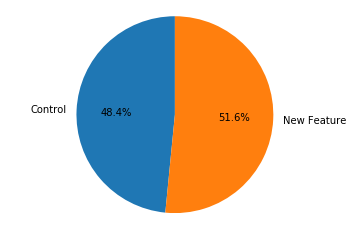

In [145]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Control', 'New Feature'
sizes = [5837, 6211]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

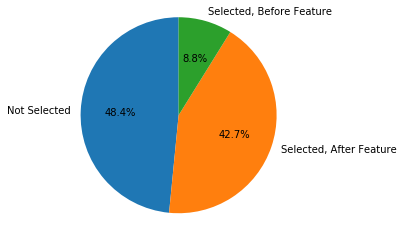

In [146]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Not Selected', 'Selected, After Feature', 'Selected, Before Feature'
sizes = [5837, 5145, 1066]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

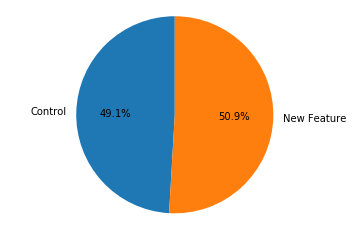

In [147]:
#Pie chart of users in each group after data is cleaned
labels = 'Control', 'New Feature'
sizes = [987, 1024]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

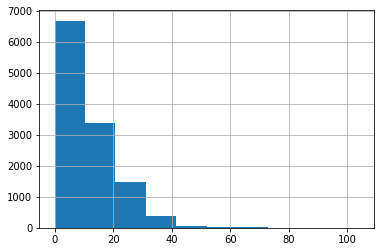

In [148]:
#Distribution of number of games played
games=data['games_played']
games.hist(bins=10)

,User_id,avg_games,avg_revenue,feature_enabled
0,1,24.750,0.0,0
1,11,5.000,0.0,2
2,12,26.125,0.0,0
3,22,24.625,0.0,2
4,32,4.000,0.0,2


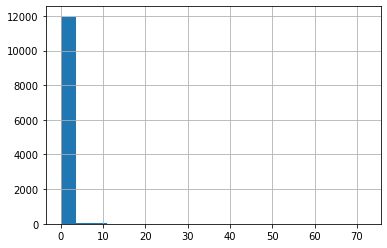

In [149]:
#Distribution of revenue
revenue=data['revenue']
revenue.hist(bins=20)

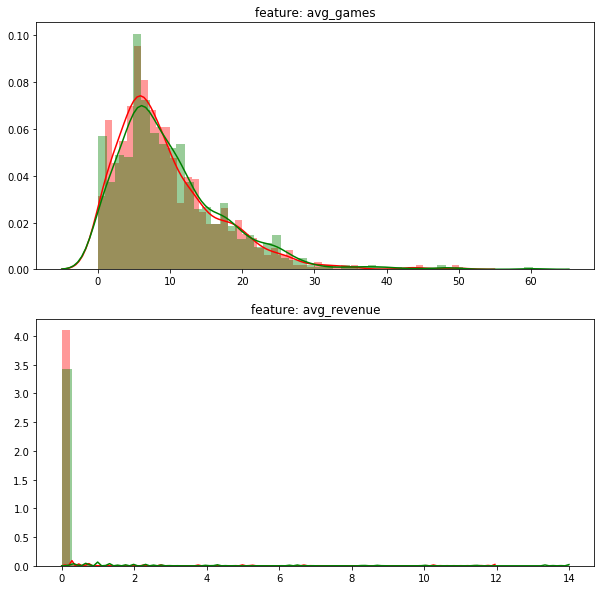

In [150]:
#Distributions of games played and revenue for each group
gs = gridspec.GridSpec(2, 1)
plt.figure(figsize=(10,10))
for i, col in enumerate(data2[data2.iloc[:,1:3].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(data2[col][data2.feature_enabled == 0], bins=50, color='r')
    sns.distplot(data2[col][data2.feature_enabled == 2], bins=50, color='g')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()

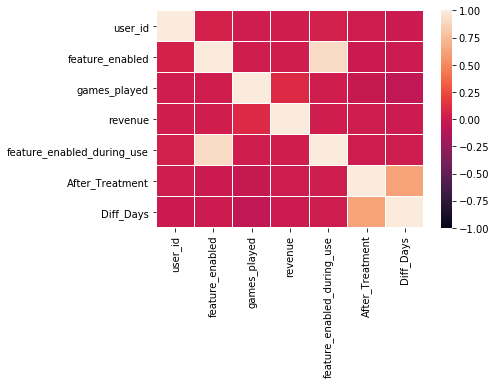

In [151]:
#Correlation matrix
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

In [152]:
#Number of Games Played Per group
#Group 0 is group that did not receive experiment
data.groupby(['feature_enabled_during_use'])['games_played'].agg('sum')

feature_enabled_during_use
0    54072
1    24846
2    60342
Name: games_played, dtype: int64

In [153]:
#Revenue per Group
data.groupby(['feature_enabled_during_use'])['revenue'].agg('sum')

feature_enabled_during_use
0    323.23
1    119.68
2    820.39
Name: revenue, dtype: float64

In [155]:
#Revenue SE
data2.groupby(['feature_enabled'])['avg_revenue'].agg('std')

feature_enabled
0    0.614203
2    1.043037
Name: avg_revenue, dtype: float64

In [156]:
#Games Played SE
data2.groupby(['feature_enabled'])['avg_games'].agg('std')

feature_enabled
0    7.168985
2    7.591954
Name: avg_games, dtype: float64

In [157]:
#Significance Test for Games Played T Test
#Fail to reject
games_test_results = data2[data2.feature_enabled == 2].avg_games
games_control_results = data2[data2.feature_enabled == 0].avg_games

games_p = stats.ttest_ind(games_test_results, games_control_results)
print(games_p)

Ttest_indResult(statistic=1.7457434053729304, pvalue=0.0810084879525783)


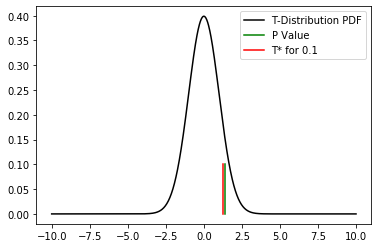

In [159]:
#Plotting Games Played T Test
dof = 2011 # Degrees of freedom
alpha = 0.1
p_val = 0.0810084879525783   # Significence level
ntails = 1      # Number of tails 

## Calculate critical t-score
tcrit = abs(stats.t.ppf(alpha/ntails, dof))
pcrit = abs(stats.t.ppf(p_val/ntails, dof))
# +=2.068

plt.figure()
xs = np.linspace(-10,10,1000)
plt.plot(xs, stats.t.pdf(xs,dof), 'k', label="T-Distribution PDF")

## Plot some vertical lines representing critical t-score cutoff
critline = np.linspace(0,alpha/ntails)  # y range for critical line, AKA probability from 0-p*
xs_1 = len(critline) * [pcrit]         # X ranges for plotting
xs_2 = len(critline) * [tcrit]
plt.plot(xs_1, critline, 'g', label="P Value")
plt.plot(xs_2, critline,'r', label="T* for 0.1")
plt.legend()

In [137]:
#Significance Test for Revenue T Test

revenue_test_results = data2[data2.feature_enabled == 2].avg_revenue
revenue_control_results = data2[data2.feature_enabled == 0].avg_revenue

revenue_p = stats.ttest_ind(revenue_test_results, revenue_control_results)
print(revenue_p)

Ttest_indResult(statistic=2.1339706618884215, pvalue=0.03296602717398876)


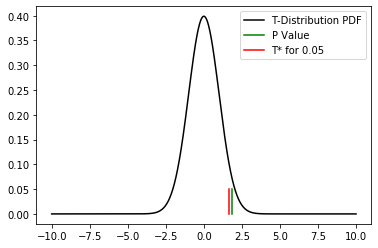

In [160]:
#Plotting Revenue T Test
dof = 2011 # Degrees of freedom
alpha = 0.05
p_val_2 = 0.03316653426317963    # Significence level
ntails = 1      # Number of tails 

## Calculate critical t-score
tcrit = abs(stats.t.ppf(alpha/ntails, dof))
pcrit = abs(stats.t.ppf(p_val_2/ntails, dof))
# +=2.068

plt.figure()
xs = np.linspace(-10,10,1000)
plt.plot(xs, stats.t.pdf(xs,dof), 'k', label="T-Distribution PDF")

## Plot some vertical lines representing critical t-score cutoff
critline = np.linspace(0,alpha/ntails)  # y range for critical line, AKA probability from 0-p*
xs_1 = len(critline) * [pcrit]         # X ranges for plotting
xs_2 = len(critline) * [tcrit]
plt.plot(xs_1, critline, 'g', label="P Value")
plt.plot(xs_2, critline,'r', label="T* for 0.05")
plt.legend()

In [141]:
#MWU Significance Test for Revenue
stats.mannwhitneyu(revenue_test_results, revenue_control_results)

MannwhitneyuResult(statistic=494268.0, pvalue=0.003741232927946108)

In [142]:
#MWU Significance Test for Number of games
stats.mannwhitneyu(games_test_results, games_control_results)

MannwhitneyuResult(statistic=481896.0, pvalue=0.038799978433857615)

In [90]:
#Changing date to date type for regression
data['event_date'] = pd.to_datetime(data.event_date)
data.head()

,user_id,feature_enabled,experiment_selected_date,event_date,games_played,revenue,feature_enabled_during_use,After_Treatment,Diff_Days
0,1,0,01/17/2018,2018-01-15,31,0.0,1,0,-2
1,1,0,01/17/2018,2018-01-16,8,0.0,1,0,-1
2,1,0,01/17/2018,2018-01-17,27,0.0,0,1,0
3,1,0,01/17/2018,2018-01-18,20,0.0,0,1,1
4,1,0,01/17/2018,2018-01-19,39,0.0,0,1,2


In [95]:
#Creating DiD variable and building regressions
data['DiD']= data['feature_enabled']*data['After_Treatment']
Rev = np.array((data['revenue']))
Games = np.array((data['games_played']))
X_Rev = data[['feature_enabled', 'After_Treatment', 'Diff_Days', 'games_played','DiD']]
X_Games = data[['feature_enabled', 'After_Treatment', 'Diff_Days', 'revenue','DiD']]

model1 = sm.OLS(Rev, X_Rev).fit()
model2 = sm.OLS(Games, X_Games).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.017
Model:                            OLS   Adj. R-squared (uncentered):              0.016
Method:                 Least Squares   F-statistic:                              40.71
Date:                Sat, 25 Apr 2020   Prob (F-statistic):                    1.14e-41
Time:                        13:22:30   Log-Likelihood:                         -20871.
No. Observations:               12045   AIC:                                  4.175e+04
Df Residuals:                   12040   BIC:                                  4.179e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
feature_enabled    -0.1117      0.045     -2.478      0.013      -0.200      -0.023
After_Treatment    -0.0752      0.030     -2.478      0.013      -0.135      -0.016
Diff_Days          -0.0017      0.006     -0.289      0.773      -0.013       0.010
games_played        0.0132      0.001     10.871      0.000       0.011       0.016
DiD                 0.1970      0.053      3.746      0.000       0.094       0.300
==============================================================================
Omnibus:                    29005.189   Durbin-Watson:                   1.657
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        409451021.159
Skew:                          24.854   Prob(JB):                         0.00
Kurtosis:                     904.871   Cond. No.                         82.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.543
Model:                            OLS   Adj. R-squared (uncentered):              0.543
Method:                 Least Squares   F-statistic:                              2864.
Date:                Sat, 25 Apr 2020   Prob (F-statistic):                        0.00
Time:                        13:22:31   Log-Likelihood:                         -45121.
No. Observations:               12045   AIC:                                  9.025e+04
Df Residuals:                   12040   BIC:                                  9.029e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
feature_enabled    11.5644      0.321     36.058      0.000      10.936      12.193
After_Treatment    12.7000      0.196     64.855      0.000      12.316      13.084
Diff_Days          -0.5350      0.043    -12.308      0.000      -0.620      -0.450
revenue             0.7383      0.068     10.871      0.000       0.605       0.871
DiD               -11.0502      0.381    -29.009      0.000     -11.797     -10.304
==============================================================================
Omnibus:                     3155.318   Durbin-Watson:                   1.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9669.770
Skew:                           1.347   Prob(JB):                         0.00
Kurtosis:                       6.465   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""